In [ ]:
import os

# Paths to the directories for edge-based images in each dataset split
train_images_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/train'
val_images_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/val'
test_images_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test'

# Function to rename files by removing 'edges_' prefix
def rename_images(image_path):
    for filename in os.listdir(image_path):
        if filename.startswith("edges_") and filename.endswith(".png"):
            # New filename without the 'edges_' prefix
            new_filename = filename.replace("edges_", "", 1)
            os.rename(
                os.path.join(image_path, filename),
                os.path.join(image_path, new_filename)
            )
            print(f"Renamed: {filename} to {new_filename}")

# Rename images in each split directory
rename_images(train_images_path)
rename_images(val_images_path)
rename_images(test_images_path)

print("Image renaming completed.")


Renamed: edges_01_img83.png to 01_img83.png
Renamed: edges_02_img148.png to 02_img148.png
Renamed: edges_02_img10.png to 02_img10.png
Renamed: edges_01_img131.png to 01_img131.png
Renamed: edges_01_img182.png to 01_img182.png
Renamed: edges_01_img268.png to 01_img268.png
Renamed: edges_01_img71.png to 01_img71.png
Renamed: edges_01_img280.png to 01_img280.png
Renamed: edges_01_img234.png to 01_img234.png
Renamed: edges_02_img100.png to 02_img100.png
Renamed: edges_01_img53.png to 01_img53.png
Renamed: edges_01_img72.png to 01_img72.png
Renamed: edges_01_img176.png to 01_img176.png
Renamed: edges_01_img58.png to 01_img58.png
Renamed: edges_01_img227.png to 01_img227.png
Renamed: edges_01_img242.png to 01_img242.png
Renamed: edges_01_img118.png to 01_img118.png
Renamed: edges_01_img132.png to 01_img132.png
Renamed: edges_01_img272.png to 01_img272.png
Renamed: edges_01_img145.png to 01_img145.png
Renamed: edges_01_img138.png to 01_img138.png
Renamed: edges_01_img24.png to 01_img24.png
Re

In [ ]:
import yaml

# Paths to the dataset splits
train_images_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/train'
val_images_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/val'
test_images_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test'

# Define the names of your classes (adjust this list based on your dataset)
class_names = ['fish_larvae']  # Update if you have more than one class

# YAML content
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(class_names),  # Number of classes
    'names': class_names     # Class names
}

# Output path for the YAML file
output_yaml_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/data.yaml'

# Write the YAML file
with open(output_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"YAML file created at {output_yaml_path}")

YAML file created at /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/data.yaml


In [ ]:
!nvidia-smi

Fri Jan 17 06:28:52 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 34.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
print(ultralytics.__file__)


/usr/local/lib/python3.11/dist-packages/ultralytics/__init__.py


In [ ]:
!ls /usr/local/lib/python3.11/dist-packages/ultralytics/engine/


exporter.py  model.py	   __pycache__	trainer.py  validator.py
__init__.py  predictor.py  results.py	tuner.py


In [ ]:
!ls /usr/local/lib/python3.11/dist-packages/ultralytics/utils/


autobatch.py   checks.py     errors.py	  instance.py  ops.py	    __pycache__     triton.py
benchmarks.py  dist.py	     files.py	  loss.py      patches.py   tal.py	    tuner.py
callbacks      downloads.py  __init__.py  metrics.py   plotting.py  torch_utils.py


In [ ]:
!cat /usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py


# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license
"""Model validation metrics."""

import math
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

from ultralytics.utils import LOGGER, SimpleClass, TryExcept, plt_settings

OKS_SIGMA = (
    np.array([0.26, 0.25, 0.25, 0.35, 0.35, 0.79, 0.79, 0.72, 0.72, 0.62, 0.62, 1.07, 1.07, 0.87, 0.87, 0.89, 0.89])
    / 10.0
)


def bbox_ioa(box1, box2, iou=False, eps=1e-7):
    """
    Calculate the intersection over box2 area given box1 and box2. Boxes are in x1y1x2y2 format.

    Args:
        box1 (np.ndarray): A numpy array of shape (n, 4) representing n bounding boxes.
        box2 (np.ndarray): A numpy array of shape (m, 4) representing m bounding boxes.
        iou (bool): Calculate the standard IoU if True else return inter_area/box2_area.
        eps (float, optional): A small value to avoid division by zero. Defaults to 1e-7.

    Returns:
        (np.ndarray): A num

In [ ]:
!grep -E "maps " /usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py


grep: /usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py: No such file or directory


In [ ]:
!cat /usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py


# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license
"""
Check a model's accuracy on a test or val split of a dataset.

Usage:
    $ yolo mode=val model=yolov8n.pt data=coco8.yaml imgsz=640

Usage - formats:
    $ yolo mode=val model=yolov8n.pt                 # PyTorch
                          yolov8n.torchscript        # TorchScript
                          yolov8n.onnx               # ONNX Runtime or OpenCV DNN with dnn=True
                          yolov8n_openvino_model     # OpenVINO
                          yolov8n.engine             # TensorRT
                          yolov8n.mlpackage          # CoreML (macOS-only)
                          yolov8n_saved_model        # TensorFlow SavedModel
                          yolov8n.pb                 # TensorFlow GraphDef
                          yolov8n.tflite             # TensorFlow Lite
                          yolov8n_edgetpu.tflite     # TensorFlow Edge TPU
                          yolov8n_paddle_model     

In [ ]:
import cv2
from ultralytics import YOLO

In [ ]:
import os

# Define paths to check
train_labels_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/train'
val_labels_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/val'
test_labels_path = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/test'

def check_label_files(labels_path):
    missing_labels = []
    for image_file in os.listdir(labels_path.replace('labels', 'images')):
        label_file = os.path.splitext(image_file)[0] + '.txt'
        if not os.path.exists(os.path.join(labels_path, label_file)):
            missing_labels.append(label_file)
    if missing_labels:
        print(f"Missing labels in {labels_path}: {missing_labels}")
    else:
        print(f"All labels found in {labels_path}")

# Run checks
check_label_files(train_labels_path)
check_label_files(val_labels_path)
check_label_files(test_labels_path)


All labels found in /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/train
All labels found in /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/val
All labels found in /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/test


In [ ]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/data.yaml", epochs=100, imgsz=640)

100%|██████████| 5.35M/5.35M [00:00<00:00, 262MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 102MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/train... 2021 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2021/2021 [03:31<00:00,  9.55it/s]


train: New cache created: /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/val... 578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 578/578 [00:58<00:00,  9.92it/s]


val: New cache created: /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.55G      1.359      1.797      1.093         24        640: 100%|██████████| 127/127 [00:19<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.16it/s]


                   all        578       1784      0.929      0.785       0.88      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.56G      1.231      1.128      1.044          7        640: 100%|██████████| 127/127 [00:16<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.80it/s]

                   all        578       1784       0.85       0.85      0.891      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.55G      1.211     0.9655      1.046         23        640: 100%|██████████| 127/127 [00:16<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]

                   all        578       1784      0.918      0.865      0.931      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.55G       1.16     0.8328      1.023         30        640: 100%|██████████| 127/127 [00:16<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.40it/s]

                   all        578       1784      0.914      0.889      0.935      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.57G      1.111     0.7781      1.004         15        640: 100%|██████████| 127/127 [00:16<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.55it/s]


                   all        578       1784      0.919      0.901      0.932       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.55G       1.06      0.707     0.9915         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.79it/s]


                   all        578       1784       0.89      0.845      0.914      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.55G      1.043     0.6864     0.9809         35        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.67it/s]

                   all        578       1784      0.934      0.901      0.946      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.56G      1.019     0.6544     0.9746         19        640: 100%|██████████| 127/127 [00:16<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.11it/s]

                   all        578       1784      0.948      0.931       0.96      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.58G     0.9978     0.6444     0.9634         18        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.30it/s]

                   all        578       1784      0.949      0.917      0.962      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.56G     0.9788     0.6228     0.9586         16        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]


                   all        578       1784      0.925      0.922      0.953       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.55G     0.9581     0.6042     0.9527         13        640: 100%|██████████| 127/127 [00:16<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.70it/s]

                   all        578       1784      0.961      0.939      0.967      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.56G     0.9483     0.5907     0.9471         29        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.63it/s]


                   all        578       1784      0.947       0.93      0.959      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.53G     0.9384     0.5844     0.9432         22        640: 100%|██████████| 127/127 [00:16<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]

                   all        578       1784      0.965      0.946      0.967      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.55G     0.9437     0.5783     0.9396         23        640: 100%|██████████| 127/127 [00:16<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]

                   all        578       1784      0.957      0.938      0.964      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.55G     0.9268     0.5731     0.9396         11        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.33it/s]


                   all        578       1784      0.956      0.925      0.958      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.55G     0.9129     0.5596      0.933         27        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]

                   all        578       1784      0.945      0.942      0.965       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.54G      0.895     0.5455     0.9247         30        640: 100%|██████████| 127/127 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]


                   all        578       1784       0.92      0.816      0.857      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.56G     0.8816     0.5407     0.9274         26        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.62it/s]


                   all        578       1784      0.963      0.937      0.966      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.55G     0.8765     0.5358     0.9231         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.42it/s]

                   all        578       1784      0.946      0.952      0.966       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.58G     0.8772     0.5402     0.9234         11        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]

                   all        578       1784      0.934      0.855      0.917      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.52G     0.8824     0.5379      0.926         35        640: 100%|██████████| 127/127 [00:16<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.40it/s]


                   all        578       1784      0.955      0.945      0.967      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.56G      0.864     0.5189     0.9184         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.65it/s]


                   all        578       1784      0.948      0.951      0.974      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.55G     0.8509     0.5094     0.9172         18        640: 100%|██████████| 127/127 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]


                   all        578       1784      0.931       0.92      0.944      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.56G     0.8568     0.5174     0.9145         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.67it/s]

                   all        578       1784       0.96      0.939      0.966      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.57G     0.8373     0.5034     0.9105         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.56it/s]

                   all        578       1784      0.953      0.951      0.969       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.55G     0.8276     0.4926     0.9052         20        640: 100%|██████████| 127/127 [00:16<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.41it/s]

                   all        578       1784      0.964      0.943      0.968      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.55G     0.8324     0.4973     0.9072         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.27it/s]

                   all        578       1784      0.962      0.943      0.969       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.56G     0.8171     0.4889      0.902         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.75it/s]

                   all        578       1784      0.956      0.948      0.968      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.54G     0.8218     0.4948     0.9061         32        640: 100%|██████████| 127/127 [00:16<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.77it/s]

                   all        578       1784      0.965      0.946      0.976       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.56G     0.8241     0.4899     0.9069         14        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]

                   all        578       1784      0.963      0.956      0.972      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.54G     0.8009     0.4831        0.9         35        640: 100%|██████████| 127/127 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.62it/s]


                   all        578       1784      0.962      0.953      0.972      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.56G     0.8109     0.4791     0.8975         20        640: 100%|██████████| 127/127 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]

                   all        578       1784       0.96      0.947      0.973      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.55G     0.8072     0.4776     0.8983         26        640: 100%|██████████| 127/127 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]

                   all        578       1784      0.967      0.958      0.974      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.56G     0.7906      0.468      0.898         19        640: 100%|██████████| 127/127 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.47it/s]

                   all        578       1784      0.955      0.927      0.955      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.54G     0.7913     0.4668     0.8933         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.51it/s]


                   all        578       1784      0.957      0.951      0.968      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.56G     0.7929     0.4696     0.8936         35        640: 100%|██████████| 127/127 [00:16<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.81it/s]

                   all        578       1784      0.949       0.94      0.963       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.55G     0.7742      0.459     0.8946         14        640: 100%|██████████| 127/127 [00:16<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]

                   all        578       1784      0.959      0.953      0.972      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.56G      0.796     0.4695     0.8945         12        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.46it/s]

                   all        578       1784       0.97       0.95      0.974      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.55G      0.765     0.4507     0.8889         19        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.29it/s]

                   all        578       1784      0.974      0.953      0.976      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.56G     0.7771      0.456     0.8908         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]


                   all        578       1784       0.96      0.952      0.972      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.57G     0.7754     0.4555     0.8902         14        640: 100%|██████████| 127/127 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.70it/s]

                   all        578       1784      0.965      0.957      0.976      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.54G     0.7638     0.4541     0.8884         29        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]

                   all        578       1784      0.972      0.959      0.978      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.55G     0.7706     0.4492     0.8904         30        640: 100%|██████████| 127/127 [00:16<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]


                   all        578       1784      0.965      0.956      0.972      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.56G     0.7734     0.4484     0.8892         35        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.37it/s]

                   all        578       1784      0.969      0.956      0.975      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.55G     0.7654     0.4481     0.8926         22        640: 100%|██████████| 127/127 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]

                   all        578       1784       0.97      0.956      0.976      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.56G     0.7493     0.4406     0.8815         17        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.57it/s]


                   all        578       1784      0.972      0.958      0.977      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.54G      0.745     0.4346     0.8801         28        640: 100%|██████████| 127/127 [00:16<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.89it/s]

                   all        578       1784      0.968      0.951      0.971      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.54G     0.7627     0.4409     0.8862         33        640: 100%|██████████| 127/127 [00:16<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.47it/s]

                   all        578       1784      0.973      0.955      0.979      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.56G     0.7391     0.4288     0.8792         25        640: 100%|██████████| 127/127 [00:16<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]


                   all        578       1784      0.969      0.959      0.977       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.58G      0.739     0.4305     0.8838         29        640: 100%|██████████| 127/127 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.51it/s]


                   all        578       1784       0.96      0.958      0.972      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.53G     0.7314     0.4239     0.8754         29        640: 100%|██████████| 127/127 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]

                   all        578       1784       0.97      0.965      0.979      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.54G     0.7385       0.43     0.8794         33        640: 100%|██████████| 127/127 [00:16<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]

                   all        578       1784      0.964      0.959      0.975        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.54G     0.7404     0.4315     0.8816         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.64it/s]

                   all        578       1784      0.964      0.957      0.975      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.58G     0.7264     0.4217     0.8764         20        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        578       1784      0.965       0.95      0.968      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.55G     0.7119     0.4147      0.872         19        640: 100%|██████████| 127/127 [00:16<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.29it/s]

                   all        578       1784      0.968      0.959      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.55G     0.7128     0.4121     0.8763         32        640: 100%|██████████| 127/127 [00:16<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]

                   all        578       1784       0.97      0.954      0.971      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.55G     0.7115     0.4127     0.8722         31        640: 100%|██████████| 127/127 [00:16<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.52it/s]

                   all        578       1784      0.972      0.959      0.979      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.56G     0.7296     0.4235     0.8745         11        640: 100%|██████████| 127/127 [00:16<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]

                   all        578       1784      0.971      0.954      0.973      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.55G     0.7143     0.4092     0.8715         20        640: 100%|██████████| 127/127 [00:16<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]

                   all        578       1784      0.975      0.952      0.978      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.57G      0.708     0.4115     0.8706         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]


                   all        578       1784      0.975      0.966      0.978      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.57G     0.7145     0.4092     0.8756         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]

                   all        578       1784      0.956      0.845        0.9      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.56G     0.7096     0.4057     0.8759         17        640: 100%|██████████| 127/127 [00:16<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.63it/s]


                   all        578       1784      0.959      0.832      0.865      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.55G     0.6948     0.4026     0.8656         11        640: 100%|██████████| 127/127 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]

                   all        578       1784      0.958      0.821      0.857      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.57G     0.6943     0.4023     0.8675         22        640: 100%|██████████| 127/127 [00:16<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.57it/s]

                   all        578       1784       0.91      0.816      0.863      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.57G     0.6963     0.4022      0.865         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]

                   all        578       1784      0.899       0.68      0.777      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.57G     0.6889      0.401     0.8677         21        640: 100%|██████████| 127/127 [00:16<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.37it/s]

                   all        578       1784      0.945      0.818      0.851      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.55G     0.6875     0.3955     0.8653         27        640: 100%|██████████| 127/127 [00:16<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]


                   all        578       1784      0.939      0.917      0.945      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.56G     0.6783     0.3911     0.8629         28        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.65it/s]

                   all        578       1784      0.847      0.525      0.583      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.56G     0.6889     0.3963     0.8631         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]

                   all        578       1784      0.976       0.84      0.863      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.53G     0.6853     0.3913     0.8636         24        640: 100%|██████████| 127/127 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]

                   all        578       1784      0.921      0.677      0.731      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.56G      0.676     0.3904     0.8601         14        640: 100%|██████████| 127/127 [00:16<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.48it/s]

                   all        578       1784      0.972      0.824      0.854      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.56G     0.6663     0.3854     0.8599         19        640: 100%|██████████| 127/127 [00:16<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.62it/s]

                   all        578       1784      0.963      0.952       0.97      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.55G     0.6754     0.3919     0.8627         27        640: 100%|██████████| 127/127 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.67it/s]

                   all        578       1784      0.974       0.96      0.979       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.56G     0.6675     0.3878     0.8598         11        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.46it/s]


                   all        578       1784      0.974       0.84      0.874      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.54G     0.6689     0.3827     0.8604         22        640: 100%|██████████| 127/127 [00:16<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]

                   all        578       1784      0.939      0.909      0.945      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.55G      0.672     0.3881      0.861         27        640: 100%|██████████| 127/127 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]


                   all        578       1784      0.975      0.956      0.973      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.57G     0.6538     0.3756     0.8577         32        640: 100%|██████████| 127/127 [00:16<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.42it/s]

                   all        578       1784      0.966      0.947      0.973      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.55G     0.6577     0.3823     0.8581         23        640: 100%|██████████| 127/127 [00:16<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]

                   all        578       1784      0.969      0.955      0.973       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.54G     0.6546     0.3767      0.858         23        640: 100%|██████████| 127/127 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.46it/s]

                   all        578       1784      0.968      0.959      0.974      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.57G     0.6441     0.3725     0.8565         14        640: 100%|██████████| 127/127 [00:16<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.79it/s]

                   all        578       1784      0.967      0.965      0.976      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.56G      0.652     0.3721     0.8546         18        640: 100%|██████████| 127/127 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.59it/s]


                   all        578       1784      0.972      0.966      0.979      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.56G     0.6625     0.3762     0.8582         15        640: 100%|██████████| 127/127 [00:16<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]

                   all        578       1784      0.977      0.956      0.976      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.55G      0.644     0.3697     0.8521         12        640: 100%|██████████| 127/127 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]


                   all        578       1784      0.973      0.959      0.975      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.55G     0.6492     0.3727     0.8571         29        640: 100%|██████████| 127/127 [00:16<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.71it/s]


                   all        578       1784      0.977      0.966      0.978      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.56G      0.635     0.3628     0.8522         20        640: 100%|██████████| 127/127 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]

                   all        578       1784      0.974      0.962      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.56G     0.6434     0.3642      0.854         31        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]


                   all        578       1784      0.963      0.893      0.943      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.54G     0.6263     0.3586     0.8537         19        640: 100%|██████████| 127/127 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.33it/s]

                   all        578       1784       0.97      0.965      0.979      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.57G     0.6415     0.3644     0.8511         23        640: 100%|██████████| 127/127 [00:16<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.30it/s]

                   all        578       1784      0.974      0.957      0.975      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.57G     0.6331     0.3618     0.8502         30        640: 100%|██████████| 127/127 [00:16<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.57it/s]

                   all        578       1784      0.971      0.964      0.976      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.56G      0.641     0.3656     0.8549         18        640: 100%|██████████| 127/127 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.76it/s]

                   all        578       1784      0.979      0.961      0.979      0.822


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.53G     0.6156     0.3404     0.8534         17        640: 100%|██████████| 127/127 [00:17<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.55it/s]


                   all        578       1784      0.978       0.96      0.978      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.52G     0.5896     0.3298     0.8453         17        640: 100%|██████████| 127/127 [00:15<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.35it/s]

                   all        578       1784      0.969      0.969       0.98      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.53G     0.5902     0.3302     0.8466         12        640: 100%|██████████| 127/127 [00:15<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]

                   all        578       1784       0.98      0.971      0.983      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.53G     0.5946       0.33     0.8454         18        640: 100%|██████████| 127/127 [00:15<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.24it/s]


                   all        578       1784      0.977       0.97       0.98      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.52G     0.5857      0.326     0.8449         13        640: 100%|██████████| 127/127 [00:15<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.58it/s]

                   all        578       1784      0.977       0.97       0.98       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.52G     0.5829     0.3257     0.8443         14        640: 100%|██████████| 127/127 [00:15<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.59it/s]

                   all        578       1784      0.976      0.967       0.98      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.53G     0.5742     0.3195     0.8418         15        640: 100%|██████████| 127/127 [00:15<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.67it/s]

                   all        578       1784      0.974      0.969      0.978      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.53G     0.5708     0.3159     0.8407          9        640: 100%|██████████| 127/127 [00:15<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.82it/s]


                   all        578       1784      0.977      0.971      0.982      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.52G     0.5691     0.3149     0.8401         13        640: 100%|██████████| 127/127 [00:15<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]

                   all        578       1784      0.976      0.971      0.977      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.52G      0.571     0.3187     0.8369         16        640: 100%|██████████| 127/127 [00:16<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]

                   all        578       1784      0.979      0.971      0.978      0.832



100 epochs completed in 0.558 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.47it/s]


                   all        578       1784      0.974       0.97      0.977      0.836
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


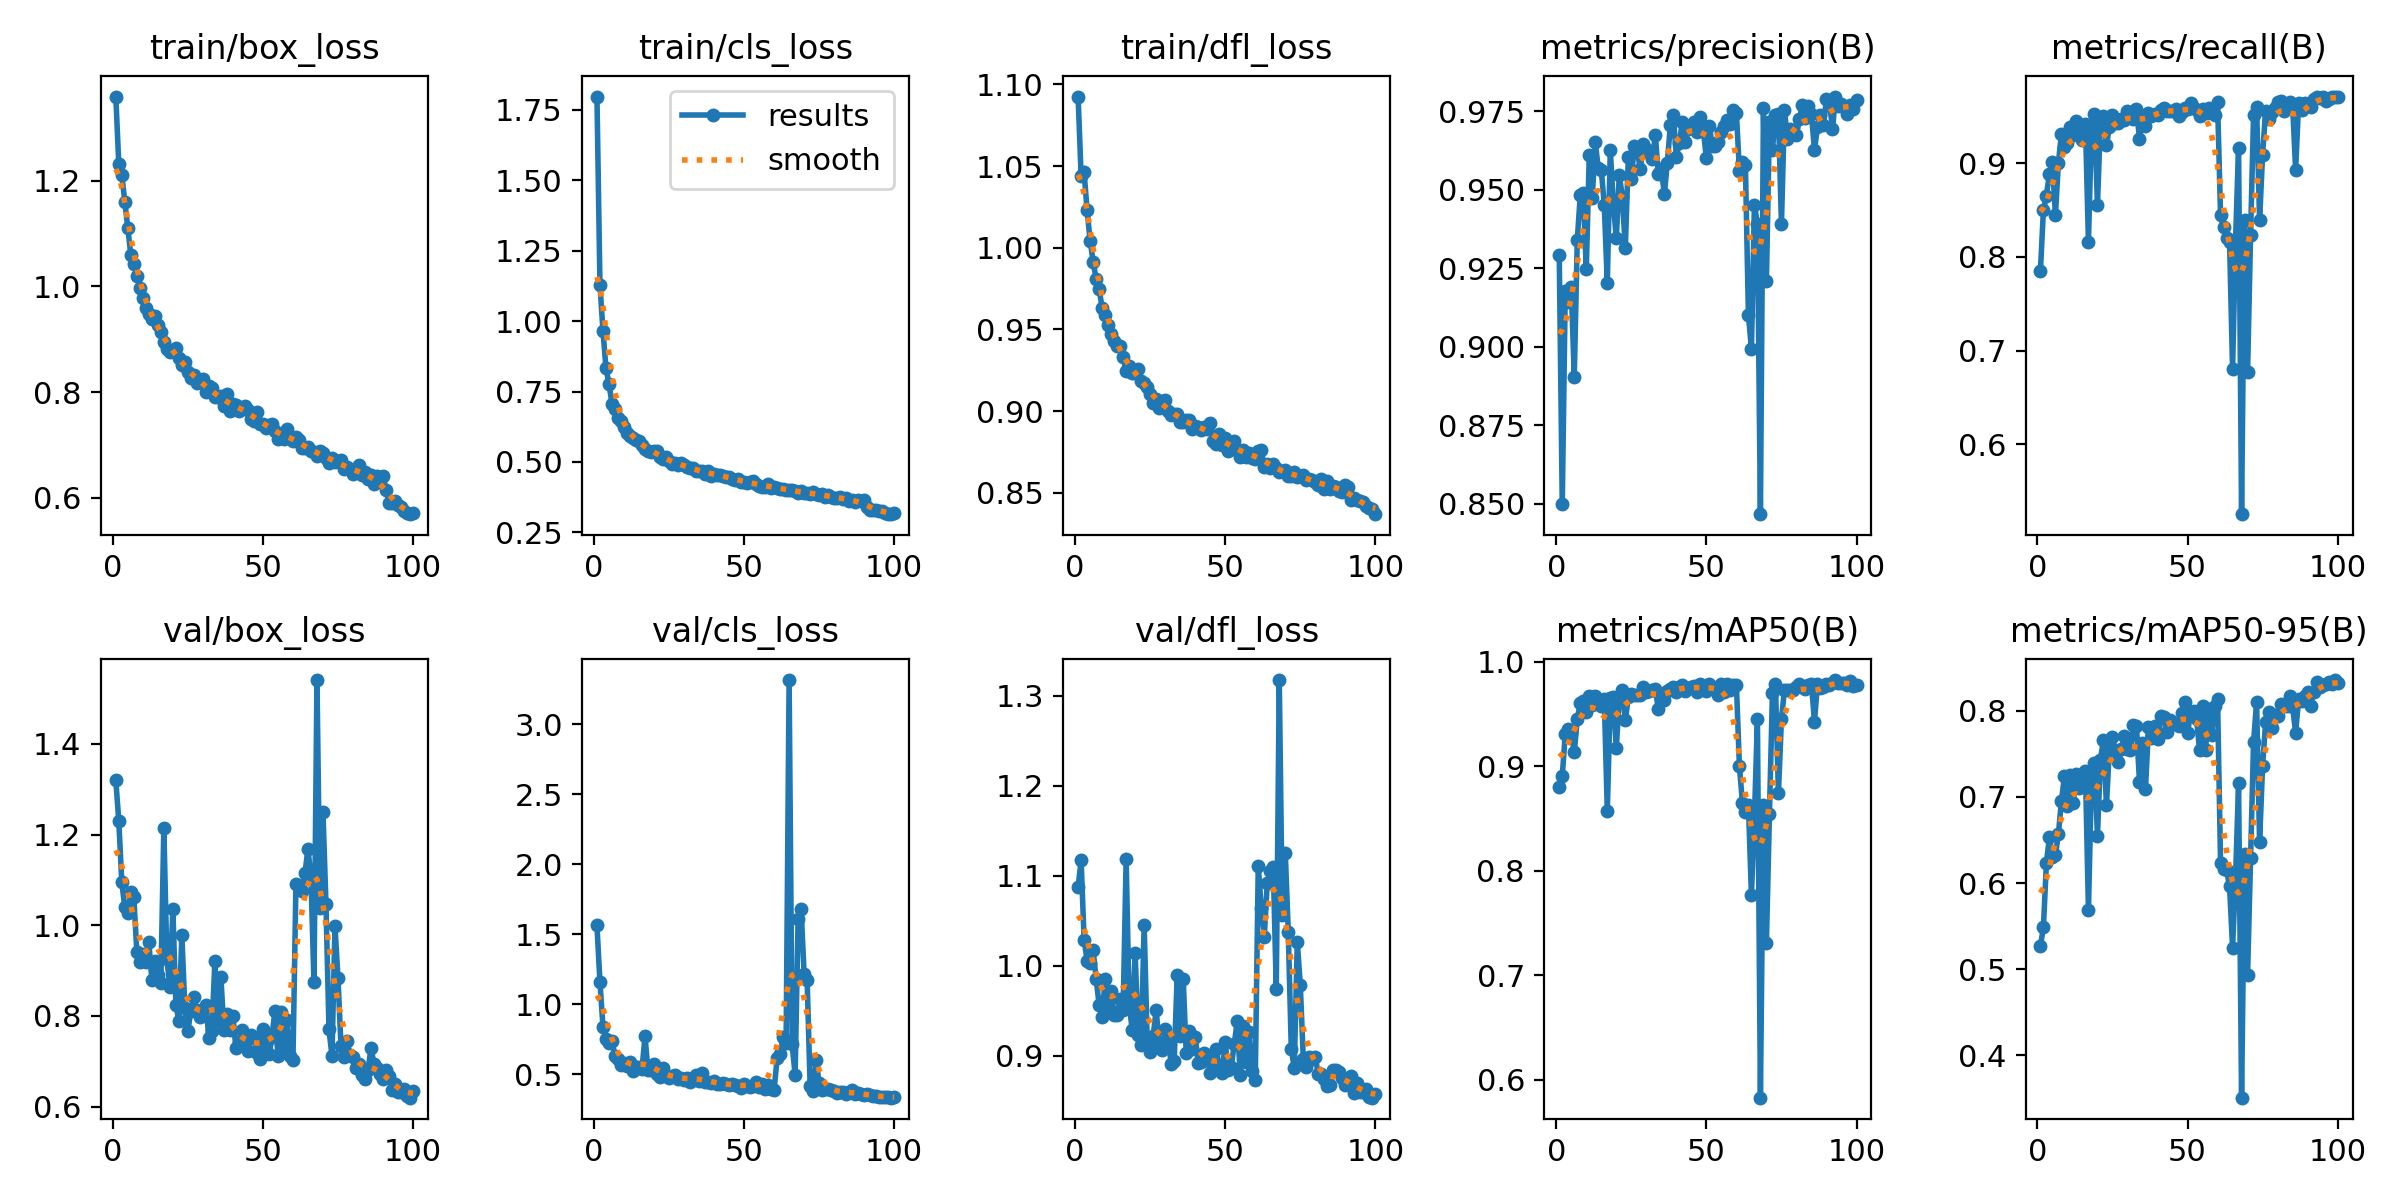

In [ ]:
from IPython.display import Image, display

# Display the results plot from the runs/detect/train directory
display(Image(filename="runs/detect/train/results.png"))


In [ ]:
import shutil

# Define the source and destination paths
source_path = "runs/detect/train"  # or "runs/train/exp" if you see a train directory
destination_path = "/content/drive/MyDrive/yolo_results/train_results_edge"

# Copy the results folder to Google Drive
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
print(f"Results saved to {destination_path}")


Results saved to /content/drive/MyDrive/yolo_results/train_results_edge


In [ ]:
import pandas as pd
import glob

# Locate the latest results CSV file in the detect or train directory
latest_exp = sorted(glob.glob("runs/detect/train*"))[-1]
results_csv = f"{latest_exp}/results.csv"

# Load the CSV file
results_df = pd.read_csv(results_csv)

# Display the metrics available in the results.csv file
print("Available Metrics:\n", results_df.columns)
print(results_df.tail())  # Display metrics from the final epochs


Available Metrics:
 Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  1928.40         0.58286         0.32569         0.84430   
96     97  1947.72         0.57417         0.31953         0.84183   
97     98  1967.12         0.57082         0.31587         0.84073   
98     99  1986.70         0.56908         0.31489         0.84015   
99    100  2006.69         0.57096         0.31875         0.83686   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.97623            0.96704           0.97951   
96               0.97407            0.96862           0.97785   
97               0.97697            0.97141           0.98197   
98         

In [ ]:
# Display metrics for the final epoch
final_metrics = results_df.iloc[-1]  # Get the last row for the final epoch

print("Final Epoch Metrics:")
print(f"Precision: {final_metrics['metrics/precision(B)']}")
print(f"Recall: {final_metrics['metrics/recall(B)']}")
print(f"mAP@0.5: {final_metrics['metrics/mAP50(B)']}")
print(f"mAP@0.5:0.95: {final_metrics['metrics/mAP50-95(B)']}")



Final Epoch Metrics:
Precision: 0.97853
Recall: 0.97083
mAP@0.5: 0.97752
mAP@0.5:0.95: 0.83207


In [ ]:
import os
import json

# Define the path to the labels folder containing 'train' and 'val' subdirectories
main_label_folder = '/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/'
count_data = {}  # Dictionary to store counts with image paths

# Loop through each split (train, val, test)
for split in ['train', 'val', 'test']:
    split_folder = os.path.join(main_label_folder, split)

    # Check if the directory exists
    if not os.path.exists(split_folder):
        print(f"Warning: {split_folder} does not exist. Skipping this split.")
        continue

    # Loop through each label file in the split folder
    for label_file in os.listdir(split_folder):
        label_path = os.path.join(split_folder, label_file)

        # Count the rows in the label file; each row represents one fish
        with open(label_path, 'r') as file:
            fish_count = sum(1 for line in file)

        # Store the count with the image path (without file extension)
        image_name = label_file.split('.')[0]
        count_data[f"{split}/{image_name}"] = fish_count

# Save count data to a JSON file for verification
output_file = '/content/drive/MyDrive/Colab_Notebooks/fish_counts.json'
with open(output_file, 'w') as json_file:
    json.dump(count_data, json_file)

print(f"Fish counts from YOLO labels saved to {output_file}")

# Display a few entries to confirm
for key, value in list(count_data.items())[:10]:
    print(f"{key}: {value}")


Fish counts from YOLO labels saved to /content/drive/MyDrive/Colab_Notebooks/fish_counts.json
train/07_img87: 4
train/08_img02: 3
train/07_img30: 4
train/07_img79: 4
train/07_img80: 4
train/07_img52: 4
train/08_img06: 3
train/07_img13: 4
train/07_img70: 4
train/07_img95: 4


In [ ]:
import os
import json

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")  # Replace with the path to your trained weights

# Define the path to your images directory
image_dir = "/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test"
pred_counts = {}  # Dictionary to store predicted counts

# Run inference on each image in the test folder
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)

    # Perform inference with YOLO model
    results = model(image_path)

    # Count detected objects (bounding boxes)
    num_boxes = len(results[0].boxes)

    # Save count with image name
    image_name = image_file.split('.')[0]
    pred_counts[image_name] = num_boxes

# Save predicted counts to a JSON file for comparison
output_file = '/content/drive/MyDrive/Colab_Notebooks/predicted_fish_counts.json'
with open(output_file, 'w') as json_file:
    json.dump(pred_counts, json_file)

print(f"Predicted fish counts saved to {output_file}")



image 1/1 /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/01_img190.png: 640x640 5 fish_larvaes, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/01_img152.png: 640x640 4 fish_larvaes, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/01_img184.png: 640x640 3 fish_larvaes, 16.5ms
Speed: 1.7ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/01_img239.png: 640x640 4 fish_larvaes, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/01_img179.png: 640x640 3 fish_larvaes, 10.0ms

In [ ]:
from sklearn.metrics import mean_absolute_error
import json

# Load true and predicted counts
with open('/content/drive/MyDrive/Colab_Notebooks/fish_counts.json', 'r') as f:
    true_counts = json.load(f)
with open('/content/drive/MyDrive/Colab_Notebooks/predicted_fish_counts.json', 'r') as f:
    pred_counts = json.load(f)

# Convert dictionary values to lists for evaluation
true_counts_list = [true_counts.get(key, 0) for key in pred_counts.keys()]
pred_counts_list = list(pred_counts.values())

# Calculate Mean Absolute Error
mae = mean_absolute_error(true_counts_list, pred_counts_list)
print("Counting Accuracy (Mean Absolute Error):", mae)


Counting Accuracy (Mean Absolute Error): 3.093425605536332


In [ ]:
import json

# Load true counts and predicted counts
with open('/content/drive/MyDrive/Colab_Notebooks/fish_counts.json', 'r') as f:
    true_counts = json.load(f)
with open('/content/drive/MyDrive/Colab_Notebooks/predicted_fish_counts.json', 'r') as f:
    pred_counts = json.load(f)

# Initialize variables for accuracy calculation
absolute_errors = []
total_test_images = 0

print("Calculations for each test image:\n")

# Loop through true counts and filter for test images
for image_name, true_count in true_counts.items():
    if image_name.startswith("test/"):  # Only process test images
        predicted_count = pred_counts.get(image_name, 0)  # Use 0 if no prediction found
        error = abs(predicted_count - true_count) / true_count if true_count > 0 else 0
        absolute_errors.append(error)
        total_test_images += 1

        # Display individual calculations
        print(f"Image: {image_name}")
        print(f"  True Count: {true_count}")
        print(f"  Predicted Count: {predicted_count}")
        print(f"  Absolute Error: {error:.4f}")
        print("-" * 30)

# Calculate overall accuracy
if total_test_images > 0:
    accuracy = (1 - (sum(absolute_errors) / total_test_images)) * 100
    print(f"\nFinal Counting Accuracy for Test Images: {accuracy:.2f}%")
else:
    print("No test images found in the dataset.")


Calculations for each test image:

Image: test/01_img19
  True Count: 4
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img184
  True Count: 3
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img143
  True Count: 4
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img170
  True Count: 3
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img114
  True Count: 4
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img119
  True Count: 4
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img190
  True Count: 4
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img152
  True Count: 4
  Predicted Count: 0
  Absolute Error: 1.0000
------------------------------
Image: test/01_img179
  True Count: 3
  Predic

In [ ]:
# Example dictionary of true counts and predictions
true_counts = {
  "test/01_img19": 4, "test/01_img184": 3, "test/01_img143": 4, "test/01_img170": 3, "test/01_img114": 4, "test/01_img119": 4, "test/01_img190": 4, "test/01_img152": 4, "test/01_img179": 3, "test/01_img164": 4, "test/02_img206": 3, "test/03_img176": 5, "test/02_img155": 3, "test/02_img220": 3, "test/01_img49": 6, "test/03_img53": 5, "test/01_img67": 3, "test/03_img40": 7, "test/04_img04": 4, "test/01_img249": 4, "test/02_img23": 3, "test/03_img198": 5, "test/02_img213": 3, "test/03_img190": 5, "test/04_img28": 4, "test/01_img51": 4, "test/04_img25": 4, "test/03_img55": 6, "test/01_img239": 5, "test/02_img31": 3, "test/04_img23": 4, "test/01_img86": 4, "test/04_img116": 4, "test/03_img08": 6, "test/02_img42": 3, "test/02_img35": 3, "test/02_img13": 3, "test/03_img06": 6, "test/01_img92": 4, "test/03_img110": 5, "test/01_img32": 4, "test/03_img28": 4, "test/02_img62": 3, "test/03_img180": 5, "test/02_img79": 3, "test/01_img79": 4, "test/01_img253": 4, "test/03_img76": 5, "test/03_img47": 5, "test/02_img03": 3, "test/03_img122": 5, "test/01_img244": 4, "test/02_img121": 3, "test/02_img77": 3, "test/02_img85": 3, "test/02_img152": 3, "test/03_img30": 4, "test/02_img101": 3, "test/04_img19": 4, "test/02_img132": 3, "test/01_img31": 4, "test/03_img91": 5, "test/02_img122": 3, "test/03_img48": 5, "test/01_img40": 4, "test/01_img57": 4, "test/03_img156": 5, "test/04_img107": 4, "test/03_img75": 5, "test/03_img14": 5, "test/02_img159": 3, "test/03_img200": 5, "test/03_img186": 5, "test/03_img18": 6, "test/03_img60": 5, "test/03_img12": 5, "test/02_img165": 3, "test/02_img149": 3, "test/05_img68": 1, "test/05_img343": 1, "test/05_img183": 1, "test/05_img126": 1, "test/06_img124": 1, "test/06_img23": 1, "test/05_img330": 1, "test/05_img65": 1, "test/04_img29": 4, "test/04_img83": 4, "test/04_img62": 4, "test/05_img194": 1, "test/05_img263": 1, "test/07_img107": 4, "test/07_img07": 4, "test/07_img102": 4, "test/06_img118": 1, "test/05_img274": 1, "test/05_img347": 2, "test/06_img88": 1, "test/04_img31": 4, "test/05_img121": 1, "test/06_img80": 1, "test/05_img257": 1, "test/05_img292": 1, "test/06_img03": 1, "test/05_img11": 1, "test/06_img131": 1, "test/05_img164": 1, "test/06_img108": 1, "test/04_img50": 4, "test/06_img01": 1, "test/04_img85": 4, "test/06_img99": 1, "test/04_img51": 4, "test/06_img30": 1, "test/04_img52": 4, "test/06_img83": 1, "test/05_img357": 1, "test/05_img177": 1, "test/06_img137": 1, "test/05_img190": 1, "test/06_img52": 1, "test/05_img240": 1, "test/05_img101": 1, "test/06_img41": 1, "test/05_img354": 1, "test/05_img250": 1, "test/05_img299": 1, "test/05_img228": 1, "test/05_img239": 1, "test/05_img309": 1, "test/05_img356": 1, "test/05_img78": 1, "test/06_img14": 1, "test/05_img94": 1, "test/05_img320": 1, "test/05_img296": 1, "test/06_img119": 1, "test/05_img205": 1, "test/05_img323": 1, "test/05_img95": 1, "test/05_img340": 1, "test/05_img187": 1, "test/04_img66": 4, "test/04_img53": 4, "test/05_img93": 1, "test/05_img115": 1, "test/05_img160": 1, "test/05_img24": 1, "test/05_img05": 1, "test/07_img24": 4, "test/08_img608": 3, "test/08_img190": 3, "test/08_img402": 3, "test/07_img48": 4, "test/08_img364": 3, "test/08_img636": 3, "test/08_img118": 3, "test/08_img598": 3, "test/08_img270": 3, "test/08_img561": 3, "test/08_img486": 3, "test/08_img558": 3, "test/08_img213": 3, "test/08_img334": 3, "test/08_img135": 3, "test/08_img285": 3, "test/08_img571": 3, "test/07_img53": 4, "test/08_img591": 3, "test/08_img321": 3, "test/08_img50": 3, "test/08_img429": 3, "test/08_img547": 3, "test/08_img194": 3, "test/08_img14": 3, "test/08_img32": 3, "test/08_img342": 3, "test/07_img71": 4, "test/08_img147": 3, "test/07_img47": 4, "test/08_img551": 3, "test/08_img523": 3, "test/08_img191": 3, "test/08_img606": 3, "test/07_img62": 4, "test/08_img482": 3, "test/08_img418": 3, "test/07_img16": 4, "test/08_img148": 3, "test/07_img77": 4, "test/08_img176": 3, "test/08_img172": 3, "test/08_img193": 3, "test/08_img406": 3, "test/08_img01": 3, "test/07_img20": 4, "test/08_img180": 3, "test/08_img590": 3, "test/08_img374": 3, "test/08_img137": 3, "test/08_img268": 3, "test/07_img18": 4, "test/08_img51": 3, "test/07_img32": 4, "test/08_img149": 3, "test/08_img503": 3, "test/07_img69": 5, "test/08_img201": 3, "test/08_img385": 3, "test/08_img391": 3, "test/08_img365": 3, "test/08_img384": 3, "test/08_img122": 3, "test/08_img233": 3, "test/08_img531": 3, "test/08_img145": 3, "test/08_img573": 3, "test/08_img78": 3, "test/08_img645": 3, "test/09_img110": 3, "test/10_img11": 4, "test/08_img698": 3, "test/10_img387": 4, "test/10_img134": 3, "test/10_img137": 3, "test/10_img330": 4, "test/10_img214": 3, "test/08_img686": 3, "test/10_img310": 4, "test/10_img280": 4, "test/10_img276": 4, "test/09_img149": 3, "test/10_img185": 3, "test/10_img174": 3, "test/10_img113": 3, "test/10_img391": 4, "test/09_img81": 3, "test/10_img413": 4, "test/10_img43": 4, "test/08_img677": 4, "test/10_img191": 3, "test/10_img295": 4, "test/10_img207": 3, "test/09_img138": 4, "test/09_img10": 3, "test/10_img240": 4, "test/10_img396": 4, "test/10_img104": 3, "test/10_img151": 3, "test/09_img53": 3, "test/10_img182": 3, "test/10_img225": 4, "test/09_img25": 3, "test/10_img366": 4, "test/10_img267": 4, "test/10_img373": 4, "test/10_img378": 4, "test/10_img383": 4, "test/10_img29": 4, "test/09_img31": 3, "test/09_img44": 3, "test/10_img15": 4, "test/10_img103": 3, "test/10_img112": 3, "test/09_img26": 3, "test/09_img02": 3, "test/08_img683": 3, "test/08_img87": 3, "test/09_img163": 3, "test/10_img226": 4, "test/08_img647": 3, "test/08_img664": 3, "test/10_img426": 4, "test/09_img74": 3, "test/10_img398": 4, "test/09_img64": 3, "test/08_img690": 3, "test/10_img184": 3, "test/08_img710": 3, "test/10_img106": 3, "test/10_img304": 4, "test/10_img268": 4, "test/09_img17": 3, "test/10_img32": 4, "test/09_img107": 3, "test/08_img701": 3, "test/09_img77": 3, "test/10_img91": 3, "test/10_img45": 4
}
predictions = {"01_img190": 5, "01_img152": 4, "01_img184": 3, "01_img239": 4, "01_img179": 3, "01_img19": 4, "01_img143": 4, "01_img164": 4, "01_img170": 3, "01_img119": 4, "01_img114": 4, "04_img19": 4, "03_img200": 5, "02_img03": 3, "02_img206": 3, "02_img155": 3, "02_img31": 3, "03_img180": 5, "03_img60": 5, "03_img122": 5, "03_img12": 4, "03_img14": 5, "03_img110": 5, "03_img18": 5, "04_img25": 4, "03_img156": 5, "02_img152": 3, "03_img48": 5, "02_img220": 3, "02_img23": 3, "02_img101": 6, "01_img244": 4, "02_img159": 3, "01_img86": 4, "03_img186": 5, "03_img08": 5, "02_img77": 3, "04_img107": 4, "01_img249": 4, "03_img198": 5, "03_img53": 5, "01_img40": 4, "01_img67": 4, "03_img06": 5, "02_img79": 3, "01_img253": 4, "02_img122": 3, "04_img116": 4, "02_img13": 3, "01_img92": 4, "02_img121": 3, "04_img29": 5, "02_img85": 3, "02_img132": 3, "01_img32": 4, "02_img35": 3, "02_img165": 3, "03_img30": 4, "02_img213": 3, "01_img57": 4, "03_img91": 4, "04_img23": 4, "03_img76": 5, "04_img28": 4, "03_img190": 5, "01_img31": 4, "02_img149": 3, "03_img75": 5, "03_img47": 5, "04_img04": 4, "01_img79": 4, "03_img176": 5, "02_img42": 3, "01_img49": 4, "03_img40": 5, "03_img55": 5, "03_img28": 6, "02_img62": 3, "01_img51": 4, "05_img194": 1, "06_img80": 1, "05_img68": 1, "05_img240": 1, "05_img228": 1, "06_img23": 1, "05_img347": 1, "06_img03": 1, "04_img31": 4, "05_img340": 1, "05_img257": 1, "07_img102": 5, "05_img187": 1, "06_img137": 1, "04_img52": 4, "05_img24": 1, "05_img05": 1, "05_img263": 1, "04_img62": 4, "05_img299": 1, "05_img205": 1, "05_img292": 1, "05_img78": 1, "05_img250": 1, "05_img354": 1, "05_img65": 1, "06_img14": 1, "05_img177": 1, "06_img83": 1, "05_img160": 1, "04_img53": 4, "07_img107": 4, "04_img85": 4, "06_img118": 1, "05_img94": 1, "04_img66": 4, "05_img11": 1, "06_img99": 1, "06_img41": 1, "06_img30": 1, "04_img83": 7, "05_img323": 1, "07_img07": 4, "06_img01": 1, "04_img51": 4, "06_img124": 1, "05_img296": 1, "05_img126": 1, "05_img93": 1, "05_img356": 1, "06_img108": 1, "05_img309": 1, "05_img190": 1, "04_img50": 4, "05_img121": 1, "05_img330": 1, "06_img88": 1, "05_img320": 1, "06_img131": 2, "06_img52": 1, "06_img119": 1, "05_img95": 1, "05_img239": 1, "05_img101": 1, "05_img164": 1, "05_img274": 1, "07_img16": 4, "05_img357": 1, "05_img183": 1, "05_img343": 1, "05_img115": 1, "08_img268": 3, "08_img402": 3, "08_img482": 3, "08_img374": 3, "08_img551": 3, "08_img406": 3, "08_img591": 3, "08_img385": 3, "08_img50": 3, "08_img285": 3, "08_img32": 3, "07_img32": 4, "07_img47": 4, "08_img391": 3, "07_img53": 4, "08_img135": 3, "08_img531": 3, "08_img342": 3, "08_img598": 3, "08_img573": 3, "08_img118": 3, "08_img213": 3, "08_img180": 3, "07_img71": 4, "08_img486": 3, "08_img606": 3, "08_img191": 3, "08_img201": 3, "08_img558": 3, "08_img233": 3, "08_img364": 3, "08_img149": 3, "08_img172": 3, "08_img429": 3, "08_img270": 3, "08_img122": 3, "08_img190": 3, "08_img51": 3, "08_img321": 3, "08_img384": 3, "08_img194": 3, "08_img193": 3, "08_img334": 3, "07_img69": 4, "08_img645": 3, "08_img137": 3, "08_img561": 3, "08_img547": 3, "08_img418": 3, "07_img62": 3, "08_img01": 3, "07_img77": 5, "08_img148": 3, "08_img503": 3, "07_img18": 4, "08_img176": 3, "08_img145": 3, "07_img20": 4, "08_img590": 3, "07_img48": 6, "08_img571": 3, "08_img365": 3, "08_img523": 3, "08_img636": 3, "08_img608": 4, "07_img24": 4, "08_img14": 3, "08_img147": 3, "10_img378": 4, "10_img191": 3, "09_img25": 3, "08_img664": 3, "10_img174": 3, "10_img182": 3, "10_img226": 5, "09_img81": 3, "10_img267": 4, "10_img151": 3, "09_img149": 3, "10_img207": 3, "10_img225": 3, "08_img647": 3, "09_img110": 3, "10_img240": 4, "10_img214": 5, "09_img64": 3, "10_img104": 3, "08_img698": 3, "10_img280": 4, "09_img74": 3, "10_img373": 4, "09_img26": 3, "09_img163": 3, "10_img398": 4, "09_img53": 3, "10_img413": 4, "10_img184": 3, "10_img185": 3, "08_img78": 3, "10_img45": 4, "10_img268": 4, "10_img134": 3, "08_img701": 3, "10_img113": 3, "10_img330": 4, "08_img710": 3, "10_img137": 3, "10_img383": 4, "10_img43": 4, "10_img391": 4, "10_img396": 4, "08_img690": 3, "08_img87": 3, "10_img32": 4, "09_img44": 3, "09_img10": 3, "09_img107": 3, "10_img387": 4, "09_img17": 3, "10_img295": 4, "10_img276": 4, "08_img686": 3, "09_img77": 3, "10_img11": 4, "10_img29": 4, "09_img02": 3, "09_img31": 3, "10_img103": 3, "10_img304": 4, "10_img426": 4, "09_img138": 3, "10_img112": 3, "10_img366": 4, "10_img15": 4, "08_img683": 3, "10_img106": 3, "08_img677": 3, "10_img310": 4, "10_img91": 3}

# Initialize variables for overall accuracy calculation
total_images = len(true_counts)
total_absolute_error = 0
total_correct = 0  # Counter for correct predictions

# Iterate over each test image
for image_path, true_count in true_counts.items():
    image_name = image_path.split('/')[-1]  # Extract just the image file name

    # Access the predicted count for the current image
    predicted_count = predictions.get(image_name, 0)  # Default to 0 if not found
    absolute_error = abs(true_count - predicted_count) / max(true_count, 1)  # Avoid division by zero

    # Update counters
    total_absolute_error += absolute_error
    if true_count == predicted_count:
        total_correct += 1

    # Display details for each image
    print(f"Image: {image_path}")
    print(f"  True Count: {true_count}")
    print(f"  Predicted Count: {predicted_count}")
    print(f"  Absolute Error: {absolute_error:.4f}")
    print("------------------------------")

# Calculate and display overall accuracy
mean_absolute_error = (total_absolute_error / total_images) * 100
counting_accuracy = (total_correct / total_images) * 100

print(f"\nFinal Counting Accuracy for Test Images: {counting_accuracy:.2f}%")
print(f"Mean Absolute Error for Test Images: {mean_absolute_error:.2f}%")


Image: test/01_img19
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img184
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img143
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img170
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img114
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img119
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img190
  True Count: 4
  Predicted Count: 5
  Absolute Error: 0.2500
------------------------------
Image: test/01_img152
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img179
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.00

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray

# Paths to the edge-based dataset and ground truth masks
edge_based_test_path = "/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/"
gt_test_path = "/content/drive/MyDrive/yolov11/fish_larvae_GT/test/"

# Initialize accumulators for metrics
iou_list = []
dice_list = []
pixel_acc_list = []

def calculate_iou_segmentation(pred_mask, gt_mask):
    # Intersection over Union (IoU)
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return (intersection / union * 100) if union != 0 else 0

def calculate_dice(pred_mask, gt_mask):
    # Dice Coefficient (F1 Score)
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    return (2 * intersection / (pred_mask.sum() + gt_mask.sum()) * 100) if (pred_mask.sum() + gt_mask.sum()) != 0 else 0

def calculate_pixel_accuracy(pred_mask, gt_mask):
    # Pixel Accuracy
    correct_pixels = (pred_mask == gt_mask).sum()
    total_pixels = gt_mask.size
    return (correct_pixels / total_pixels * 100)

def evaluate_segmentation(pred_mask, gt_mask):
    # Evaluate IoU, Dice, and Pixel Accuracy
    iou = calculate_iou_segmentation(pred_mask, gt_mask)
    dice = calculate_dice(pred_mask, gt_mask)
    pixel_acc = calculate_pixel_accuracy(pred_mask, gt_mask)
    return iou, dice, pixel_acc

# Loop through all files in the edge-based test dataset
for filename in os.listdir(edge_based_test_path):
    if filename.endswith(".png"):  # Ensure the file is a valid .png mask
        # Predicted mask (edge-based)
        pred_mask_path = os.path.join(edge_based_test_path, filename)
        pred_mask = imread(pred_mask_path)
        if pred_mask.ndim == 3:  # If the mask has 3 channels (RGB)
            pred_mask = rgb2gray(pred_mask)
        pred_mask = pred_mask > 0.5  # Convert to binary mask

        # Corresponding ground truth mask
        gt_mask_path = os.path.join(gt_test_path, filename)  # Use the same filename directly

        if os.path.exists(gt_mask_path):  # Ensure the ground truth mask exists
            gt_mask = imread(gt_mask_path)
            if gt_mask.ndim == 3:  # If the mask has 3 channels (RGB)
                gt_mask = rgb2gray(gt_mask)
            gt_mask = gt_mask > 0.5  # Convert to binary mask

            # Evaluate segmentation
            iou, dice, pixel_acc = evaluate_segmentation(pred_mask, gt_mask)

            # Store metrics
            iou_list.append(iou)
            dice_list.append(dice)
            pixel_acc_list.append(pixel_acc)
        else:
            print(f"Ground truth mask not found for: {filename}")

# Calculate and display average metrics
if iou_list:
    avg_iou = np.mean(iou_list)
    avg_dice = np.mean(dice_list)
    avg_pixel_acc = np.mean(pixel_acc_list)

    print(f"Edge-Based Segmentation Results (Test Dataset):")
    print(f"Average IoU: {avg_iou:.2f}%")
    print(f"Average Dice Coefficient: {avg_dice:.2f}%")
    print(f"Average Pixel Accuracy: {avg_pixel_acc:.2f}%")
else:
    print("No valid image pairs found for evaluation in the test dataset.")


Edge-Based Segmentation Results (Test Dataset):
Average IoU: 8.93%
Average Dice Coefficient: 15.66%
Average Pixel Accuracy: 98.31%


In [ ]:
# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolo_results/train_results_edge/weights/best.pt")  # Path to your trained model weights

results = model.val(
    data="/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/data.yaml",
    split='test',  # Explicitly specify the test split
    project="/content/drive/MyDrive/yolov11/runs/experiment_edge",
    name="edge_test" , # To save test evaluation results separately
    save=True
)

# Extract evaluation metrics
try:
    print("Evaluation Results:")
    print(f"mAP50: {results.box.map50 * 100:.2f}%")  # mAP at IoU=0.50
    print(f"mAP50-95: {results.box.map * 100:.2f}%")  # mAP averaged over IoU=0.50:0.95
    print(f"Precision: {results.box.mp * 100:.2f}%")  # Mean Precision
    print(f"Recall: {results.box.mr * 100:.2f}%")     # Mean Recall
except AttributeError as e:
    print(f"Error accessing metrics: {e}")


Ultralytics 8.3.62 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]
val: Scanning /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/test... 289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:15<00:00, 18.10it/s]

val: New cache created: /content/drive/MyDrive/yolov9/edge_based_yolo_dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.31it/s]


                   all        289        891      0.975      0.963      0.976      0.828
Speed: 0.9ms preprocess, 4.1ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/experiment_edge/edge_test
Evaluation Results:
mAP50: 97.65%
mAP50-95: 82.77%
Precision: 97.50%
Recall: 96.27%
